# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv")

# basic info of the df
print("Shape:", df.shape)
print(df.info())
print(df.describe().T.head())

#check for Nan values
print("Missing values:\n", df.isna().sum().sort_values(ascending=False).head())

Shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_19028\3807629486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')


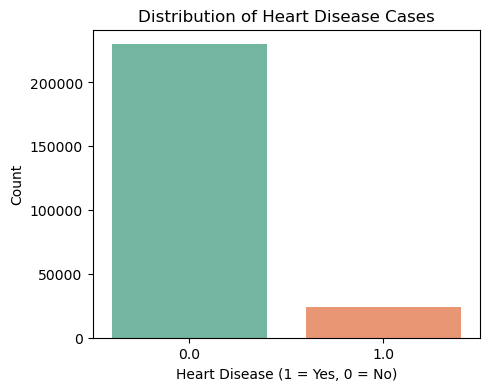

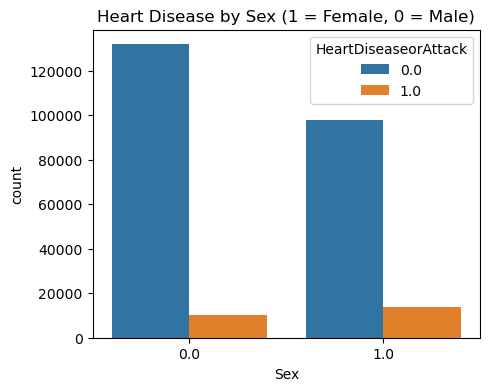

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_19028\3807629486.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=age_range, y="HeartDiseaseorAttack", palette="coolwarm",errorbar=None)


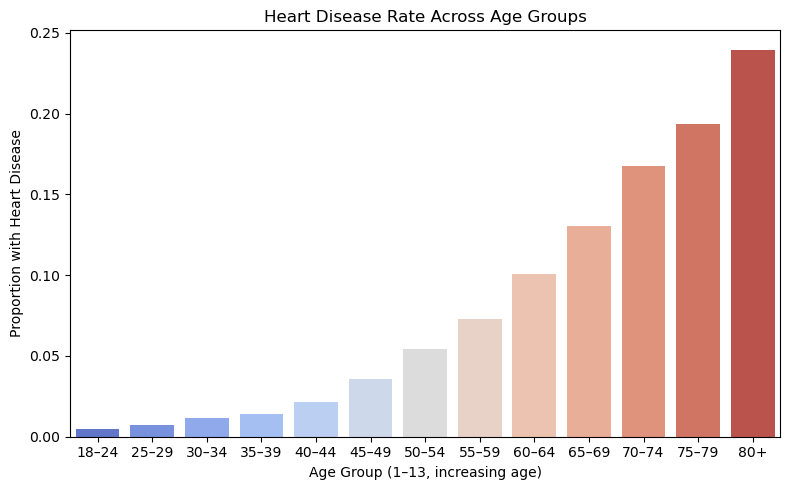

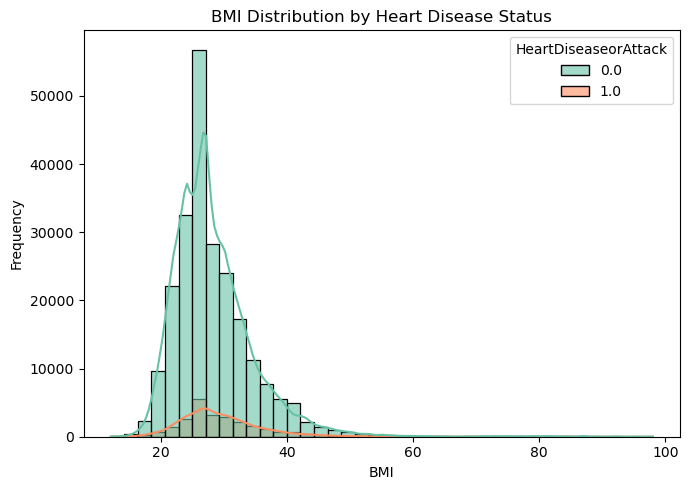

In [2]:
# EDA
plt.figure(figsize=(5,4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.savefig("../figures/heart_disease_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(5,4))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease by Sex (1 = Female, 0 = Male)')
plt.savefig("../figures/heart_disease_by_sex.png", dpi=300, bbox_inches='tight')
plt.show()



age_map = {
    1: "18–24",
    2: "25–29",
    3: "30–34",
    4: "35–39",
    5: "40–44",
    6: "45–49",
    7: "50–54",
    8: "55–59",
    9: "60–64",
    10: "65–69",
    11: "70–74",
    12: "75–79",
    13: "80+"
}
age_range= df["Age"].map(age_map)
age_order = [
    "18–24", "25–29", "30–34", "35–39",
    "40–44", "45–49", "50–54", "55–59",
    "60–64", "65–69", "70–74", "75–79", "80+"
]
age_range = pd.Categorical(age_range, categories=age_order, ordered=True)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x=age_range, y="HeartDiseaseorAttack", palette="coolwarm",errorbar=None)
plt.title("Heart Disease Rate Across Age Groups")
plt.xlabel("Age Group (1–13, increasing age)")
plt.ylabel("Proportion with Heart Disease")
plt.savefig("../figures/heart_disease_by_age.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



plt.figure(figsize=(7,5))
sns.histplot(data=df, x="BMI", hue="HeartDiseaseorAttack", kde=True, bins=40, palette="Set2", alpha=0.6)
plt.title("BMI Distribution by Heart Disease Status")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.savefig("../figures/bmi_distribution_by_status.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Split

In [3]:
# split data using stratified split(70 15 15)
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df,
    test_size=0.30,
    stratify=df["HeartDiseaseorAttack"],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp["HeartDiseaseorAttack"],
    random_state=42
)

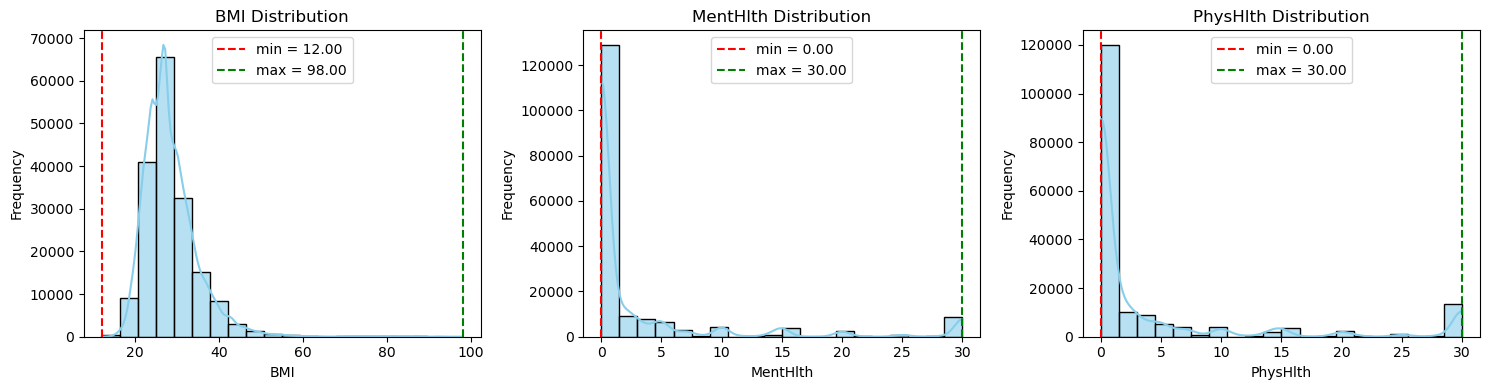

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cols = ["BMI", "MentHlth", "PhysHlth"]


fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    ax = axes[i] if len(cols) > 1 else axes

    # Plot histogram with KDE
    sns.histplot(df_train[col], bins=20, kde=True, color="skyblue", alpha=0.6, ax=ax)

    # Add vertical lines for min and max
    col_min = df_train[col].min()
    col_max = df_train[col].max()
    ax.axvline(col_min, color='red', linestyle='--', linewidth=1.5, label=f"min = {col_min:.2f}")
    ax.axvline(col_max, color='green', linestyle='--', linewidth=1.5, label=f"max = {col_max:.2f}")

    # Add labels and title
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend()
plt.savefig("../figures/numeric_feature_distributions.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [5]:
# Training set
X_train = df_train.drop(columns=["HeartDiseaseorAttack"])
y_train = df_train["HeartDiseaseorAttack"]

# Validation set
X_val = df_val.drop(columns=["HeartDiseaseorAttack"])
y_val = df_val["HeartDiseaseorAttack"]

# Test set
X_test = df_test.drop(columns=["HeartDiseaseorAttack"])
y_test = df_test["HeartDiseaseorAttack"]

# ML Pipeline

In [6]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

num_minmax = ["BMI","MentHlth", "PhysHlth"]
num_pass = [col for col in df_train.columns if col not in num_minmax + ["HeartDiseaseorAttack"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("minmax", MinMaxScaler(), num_minmax),
        ("pass", "passthrough", num_pass)
    ]
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# logistic regression
log_reg_params = {
    "model__C": [0.01, 0.1, 1.0, 5.0, 10.0],
    "model__penalty": ["l1","l2"],
    "model__solver": ["liblinear"],
}

log_reg_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(class_weight="balanced", max_iter=5000, random_state=42))
])

log_reg_search = GridSearchCV(
    log_reg_pipe,
    param_grid=log_reg_params,
    scoring="recall",
    cv=cv,
)

# randopm forest
rf_params = {
    "model__max_depth": [1, 5, 10, 30],
    "model__min_samples_split": [2, 5],
}

rf_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=500,
        class_weight="balanced_subsample",
        random_state=42,
    ))
])

rf_search = GridSearchCV(
    rf_pipe,
    param_grid=rf_params,
    scoring="recall",
    cv=cv,
)


# xgb
neg = (df_train["HeartDiseaseorAttack"] == 0).sum()
pos = (df_train["HeartDiseaseorAttack"] == 1).sum()
pos_weight = neg / pos

xgb_params = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [1, 3, 5, 8, 10],
    "model__subsample": [0.3, 0.5, 0.7],
    "model__colsample_bytree": [0.3, 0.5, 0.7],
}

xgb_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        scale_pos_weight=pos_weight,
        eval_metric="aucpr",
        random_state=42,
    ))
])

xgb_search = GridSearchCV(
    xgb_pipe,
    param_grid=xgb_params,
    scoring="recall",
    cv=cv,
)


# knn
knn_params = {
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"]
}

knn_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", KNeighborsClassifier())
])

knn_search = GridSearchCV(
    knn_pipe,
    param_grid=knn_params,
    scoring="recall",
    cv=cv,
)

searches = {
    "Logistic Regression": log_reg_search,
    "Random Forest": rf_search,
    "XGBoost": xgb_search,
    "kNN": knn_search
}

In [7]:
preprocessor.fit(X_train)

X_train_p = preprocessor.transform(X_train)
X_val_p   = preprocessor.transform(X_val)
X_test_p  = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

df_train_p = pd.DataFrame(X_train_p, columns=feature_names)
df_val_p   = pd.DataFrame(X_val_p,   columns=feature_names)
df_test_p  = pd.DataFrame(X_test_p,  columns=feature_names)

df_train_p["HeartDiseaseorAttack"] = y_train.values
df_val_p["HeartDiseaseorAttack"]   = y_val.values
df_test_p["HeartDiseaseorAttack"]  = y_test.values

df_train_p.to_csv("../data/train_preprocessed.csv", index=False)
df_val_p.to_csv("../data/val_preprocessed.csv", index=False)
df_test_p.to_csv("../data/test_preprocessed.csv", index=False)

In [8]:
best_models = {}
search_results = {}
val_metrics = {}

for name, search in searches.items():
    print(f"\n Hyperparameter tuning for {name}...")
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_

    search_results[name] = {
        "best_params": search.best_params_,
        "cv_best_score": search.best_score_
    }

    print("Best Params:", search.best_params_)

    y_val_pred = search.best_estimator_.predict(X_val)
    y_val_prob = search.best_estimator_.predict_proba(X_val)[:, 1]

    val_metrics[name] = {
        "Recall": recall_score(y_val, y_val_pred),
    }



 Hyperparameter tuning for Logistic Regression...
Best Params: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

 Hyperparameter tuning for Random Forest...
Best Params: {'model__max_depth': 5, 'model__min_samples_split': 2}

 Hyperparameter tuning for XGBoost...
Best Params: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__subsample': 0.7}

 Hyperparameter tuning for kNN...


C:\Users\liyic_fgmu\anaconda3\envs\data1030\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Best Params: {'model__n_neighbors': 3, 'model__weights': 'distance'}


In [9]:
import joblib

for name, model in best_models.items():
    filename = f"../results/best_model_{name.replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f"Saved model for {name} → {filename}")

    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    df_pred = pd.DataFrame({
        "y_val_true": y_val,
        "y_val_pred": y_pred,
        "y_val_prob": y_prob
    })
    
    filename = f"../results/val_predictions_{name.replace(' ', '_')}.csv"
    df_pred.to_csv(filename, index=False)
    print(f"Saved validation predictions for {name} → {filename}")

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    df_pred = pd.DataFrame({
        "y_test_true": y_test,
        "y_test_pred": y_pred,
        "y_test_prob": y_prob
    })

    filename = f"../results/test_predictions_{name.replace(' ', '_')}.csv"
    df_pred.to_csv(filename, index=False)
    print(f"Saved test predictions for {name} → {filename}")


Saved model for Logistic Regression → ../results/best_model_Logistic_Regression.pkl
Saved validation predictions for Logistic Regression → ../results/val_predictions_Logistic_Regression.csv
Saved test predictions for Logistic Regression → ../results/test_predictions_Logistic_Regression.csv
Saved model for Random Forest → ../results/best_model_Random_Forest.pkl
Saved validation predictions for Random Forest → ../results/val_predictions_Random_Forest.csv
Saved test predictions for Random Forest → ../results/test_predictions_Random_Forest.csv
Saved model for XGBoost → ../results/best_model_XGBoost.pkl
Saved validation predictions for XGBoost → ../results/val_predictions_XGBoost.csv
Saved test predictions for XGBoost → ../results/test_predictions_XGBoost.csv
Saved model for kNN → ../results/best_model_kNN.pkl
Saved validation predictions for kNN → ../results/val_predictions_kNN.csv
Saved test predictions for kNN → ../results/test_predictions_kNN.csv


In [10]:
val_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_val)

    val_results[name] = {
        "Recall": recall_score(y_val, y_pred),
    }

pd.DataFrame(val_results).T

best_name = max(val_results, key=lambda k: val_results[k]["Recall"])
best_model = best_models[best_name]

y_pred_test = best_model.predict(X_test)

# Result

In [11]:
print("\nFINAL TEST RESULTS")
print("Model:", best_name)
print("Recall:", recall_score(y_test, y_pred_test))


FINAL TEST RESULTS
Model: XGBoost
Recall: 0.8328683035714286


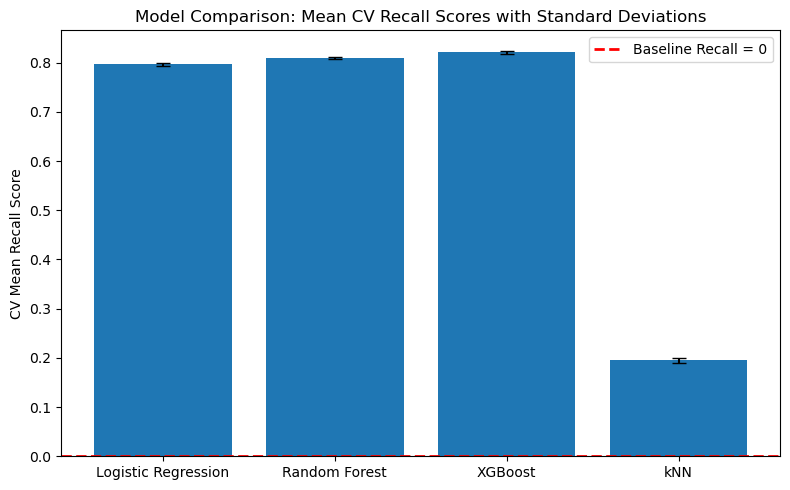

In [12]:
cv_summary = {}

for name, search in searches.items():
    mean_cv = search.best_score_
    std_cv = search.cv_results_['std_test_score'][search.best_index_]

    cv_summary[name] = {
        "mean_cv_recall": mean_cv,
        "std_cv_recall": std_cv
    }

df_cv = pd.DataFrame(cv_summary).T

plt.figure(figsize=(8,5))
plt.bar(df_cv.index, df_cv["mean_cv_recall"], yerr=df_cv["std_cv_recall"], capsize=5)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label="Baseline Recall = 0")
plt.ylabel("CV Mean Recall Score")
plt.title("Model Comparison: Mean CV Recall Scores with Standard Deviations")
plt.xticks(rotation=0)
plt.legend()
plt.savefig("../figures/model_cv_recall_comparison.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [13]:
cv_summary

{'Logistic Regression': {'mean_cv_recall': np.float64(0.7966517189835575),
  'std_cv_recall': np.float64(0.003304215696178923)},
 'Random Forest': {'mean_cv_recall': np.float64(0.8087892376681614),
  'std_cv_recall': np.float64(0.001886963687660325)},
 'XGBoost': {'mean_cv_recall': np.float64(0.8208071748878923),
  'std_cv_recall': np.float64(0.0037606421987483193)},
 'kNN': {'mean_cv_recall': np.float64(0.19491778774289983),
  'std_cv_recall': np.float64(0.004934094119169563)}}

# Confusion Matrix

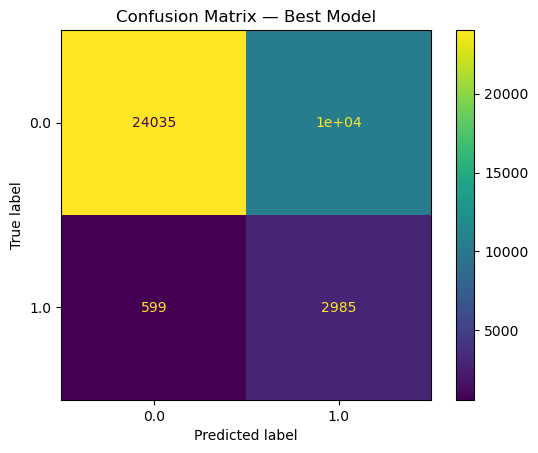

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix — Best Model")
plt.savefig("../figures/confusion_matrix_best_model.png", dpi=300, bbox_inches='tight')
plt.show()

# feature importance

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_19028\3905693952.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_gain_df.head(10), x="gain", y="feature", palette="Blues_r")


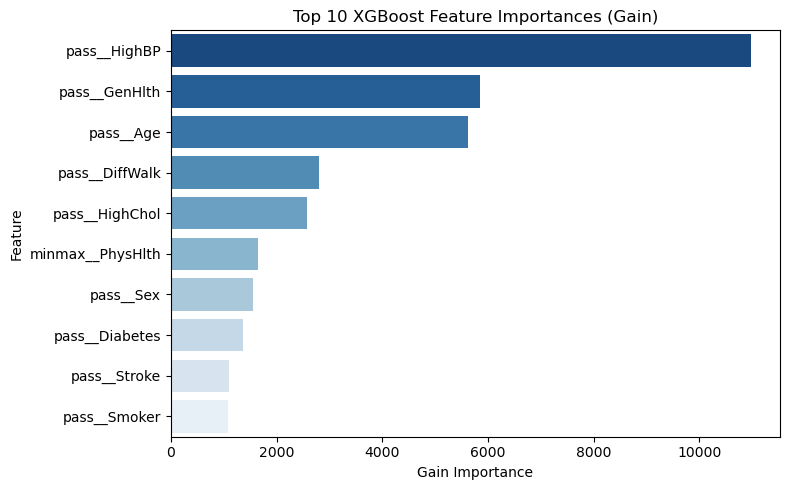

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_19028\3905693952.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_cover_df.head(10), x="cover", y="feature", palette="Blues_r")


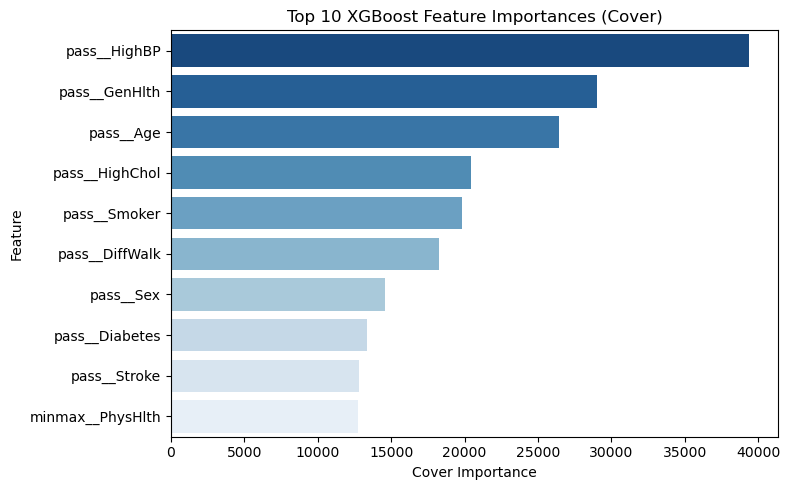

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_19028\3905693952.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_weight_df.head(10), x="weight", y="feature", palette="Blues_r")


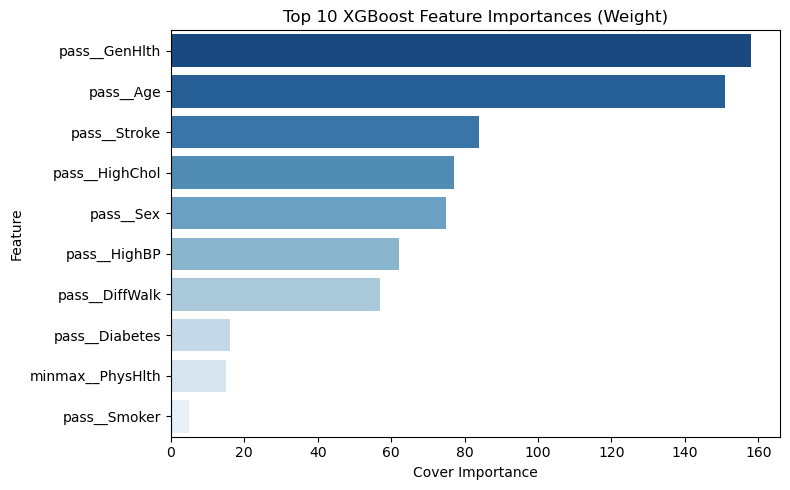

In [15]:
xgb_pipe = best_models["XGBoost"]
xgb_model = xgb_pipe.named_steps["model"]

xgb_features = xgb_pipe.named_steps["prep"].get_feature_names_out()

xgb_gain = xgb_model.get_booster().get_score(importance_type="gain")

xgb_gain_df = pd.DataFrame({
    "feature": [xgb_features[int(k[1:])] for k in xgb_gain.keys()],
    "gain": list(xgb_gain.values())
}).sort_values("gain", ascending=False)

xgb_cover = xgb_model.get_booster().get_score(importance_type="cover")

xgb_cover_df = pd.DataFrame({
    "feature": [xgb_features[int(k[1:])] for k in xgb_cover.keys()],
    "cover": list(xgb_cover.values())
}).sort_values("cover", ascending=False)

xgb_weight = xgb_model.get_booster().get_score(importance_type="weight")

xgb_weight_df = pd.DataFrame({
    "feature": [xgb_features[int(k[1:])] for k in xgb_weight.keys()],
    "weight": list(xgb_weight.values())
}).sort_values("weight", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=xgb_gain_df.head(10), x="gain", y="feature", palette="Blues_r")
plt.title("Top 10 XGBoost Feature Importances (Gain)")
plt.xlabel("Gain Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../figures/xgb_top10_feature_importance_gain.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=xgb_cover_df.head(10), x="cover", y="feature", palette="Blues_r")
plt.title("Top 10 XGBoost Feature Importances (Cover)")
plt.xlabel("Cover Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../figures/xgb_top10_feature_importance_cover.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=xgb_weight_df.head(10), x="weight", y="feature", palette="Blues_r")
plt.title("Top 10 XGBoost Feature Importances (Weight)")
plt.xlabel("Cover Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../figures/xgb_top10_feature_importance_weight.png", dpi=300)
plt.show()

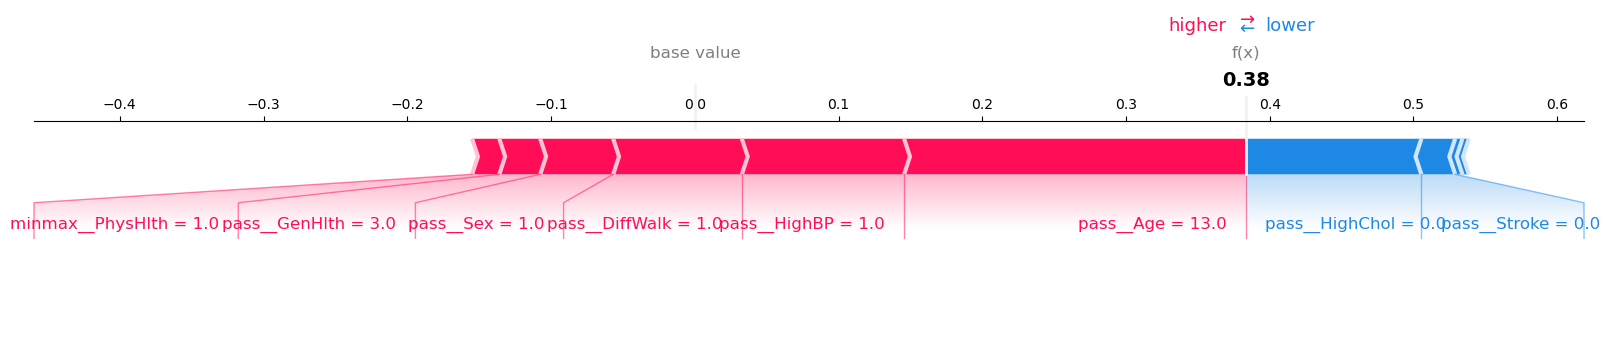

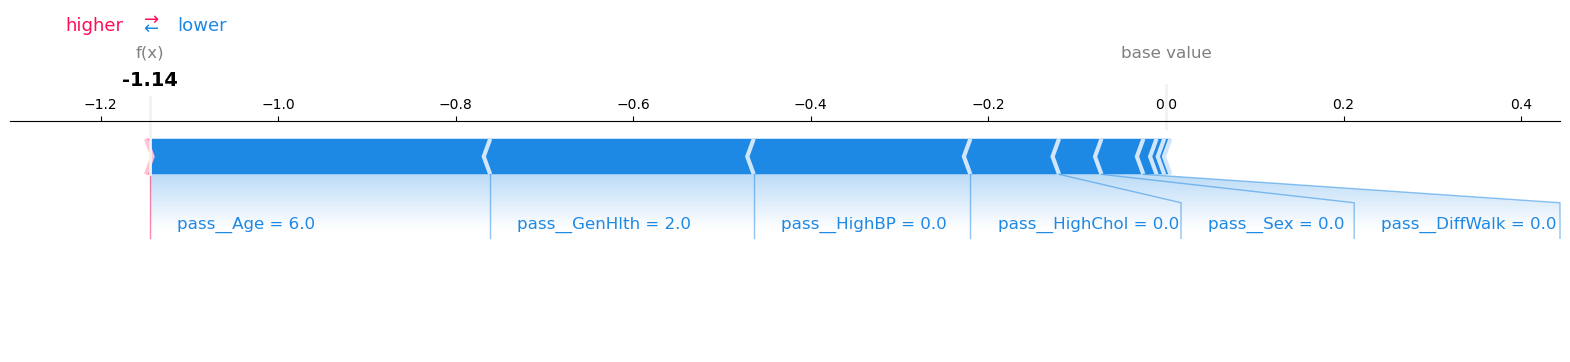

In [16]:
import shap
shap.initjs()

xgb_pipe = best_models["XGBoost"]
xgb_model = xgb_pipe.named_steps["model"]

xgb_features = xgb_pipe.named_steps["prep"].get_feature_names_out()

prep = xgb_pipe.named_steps["prep"]
X_val_transformed = prep.transform(X_val)
X_val_df = pd.DataFrame(X_val_transformed, columns=xgb_features)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_val_df)

idx1 = 0
idx2 = 30000


shap.plots.force(
    explainer.expected_value,
    shap_values.values[idx1],
    X_val_df.iloc[idx1],
    matplotlib=True
)
plt.savefig("../figures/force_plot_idx1.png", dpi=300, bbox_inches="tight")
plt.close()

shap.plots.force(
    explainer.expected_value,
    shap_values.values[idx2],
    X_val_df.iloc[idx2],
    matplotlib=True
)
plt.savefig("../figures/force_plot_idx2.png", dpi=300, bbox_inches="tight")
plt.close()
